#Keras Model:
#Activation Function:
#Loss Function#
#Optimizer:

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
#from keras.utils import to_categorical // Keras is now fully intregrated into Tensorflow. So, importing only Keras causes error
from tensorflow.keras.utils import to_categorical
import seaborn

In [ ]:
#Load Dataset
(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtrain[5999]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

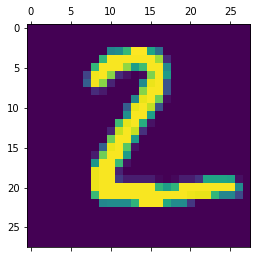

In [ ]:
plt.matshow(xtest[1])

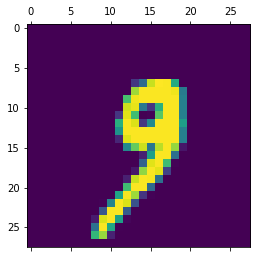

In [ ]:
plt.matshow(xtest[1000])

In [ ]:
#normalization
xtest = xtest/255
xtrain = xtrain/255

In [ ]:
xtest[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#flatten the image into 28*28 to 784
xtrain = xtrain.reshape(-1,784)
xtest = xtest.reshape(-1,784)

In [ ]:
xtrain[1].shape

(784,)

In [ ]:
#build the model
#sequentail
# 3 layer, first 2 layer 64 neuron and relu function
#output layer 10 neuron and softmax function

model = keras.Sequential()
model.add(Dense(64, activation='relu', input_dim=784))  #input layer
model.add(Dense(64, activation='relu',))  #hidden 
model.add(Dense(10, activation='softmax'))  #output

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
#train the model
model.fit(xtrain,
          to_categorical(ytrain),
          epochs = 10,
          batch_size = 32,
          )

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2734 - accuracy: 0.9197
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1226 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0898 - accuracy: 0.9728
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0709 - accuracy: 0.9782
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0572 - accuracy: 0.9822
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0489 - accuracy: 0.9843
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0424 - accuracy: 0.9859
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0358 - accuracy: 0.9881
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0323 - accuracy: 0.9892
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.026

In [ ]:
#evalulate the model
model.evaluate(xtest, to_categorical(ytest))

313/313 [==============================] - 1s 2ms/step - loss: 0.0966 - accuracy: 0.9762


[0.09658297151327133, 0.9761999845504761]

In [ ]:
pred = model.predict(xtest)
pred

array([[1.4976472e-09, 1.7021017e-06, 1.5349501e-06, ..., 9.9976712e-01,
        1.0307875e-07, 3.9307633e-05],
       [1.4114763e-11, 1.6693159e-08, 9.9999917e-01, ..., 2.2201806e-13,
        7.3330284e-08, 8.0903081e-15],
       [6.4385280e-10, 9.9984968e-01, 6.4557944e-06, ..., 1.0447192e-04,
        3.3520962e-05, 2.5256828e-09],
       ...,
       [1.0881248e-18, 2.1509043e-11, 3.6600004e-21, ..., 5.3534958e-11,
        5.1605770e-15, 3.3802448e-09],
       [3.3639450e-10, 6.0600110e-12, 1.4460069e-13, ..., 6.2404179e-11,
        1.3369787e-05, 2.1500130e-12],
       [4.7513165e-12, 9.2983008e-15, 6.5902320e-17, ..., 1.0959183e-19,
        1.6933593e-15, 1.9395509e-15]], dtype=float32)

In [ ]:
np.argmax(pred[1])

2

Text(69.0, 0.5, 'Truth Values')

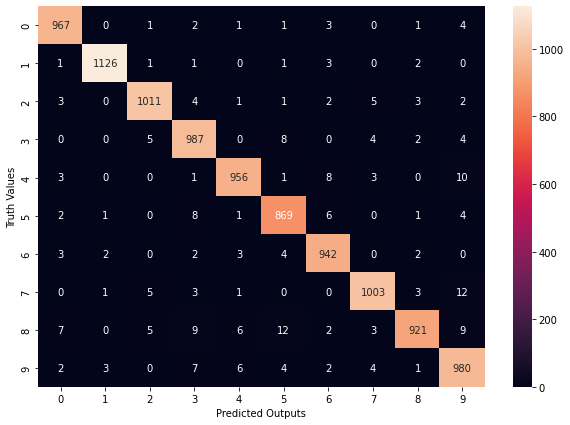

In [ ]:
y_pred = model.predict(xtest)
ypred = [np.argmax(i) for i in y_pred]
con_matrix = tf.math.confusion_matrix(labels=ytest, predictions=ypred)
plt.figure(figsize=(10,7))
seaborn.heatmap(con_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Outputs')
plt.ylabel('Truth Values')

In [ ]:
np.argmax(pred[1000])

9